<a href="https://colab.research.google.com/github/sruthivellore/SpamClassifier/blob/master/SpamManagement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import resources

In [ ]:
import pandas as pd
import re
import nltk
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC

import matplotlib.pyplot as pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Extracting data from file

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving EmailSpamCollection.csv to EmailSpamCollection.csv


In [ ]:
import io
Emails = pd.read_csv(io.StringIO(uploaded['EmailSpamCollection.csv'].decode('utf-8')), sep='\t',
                       names=["label", "mail"])

Stopwords for stemming of data

In [ ]:
nltk.download('stopwords')
ps = PorterStemmer()
corpus = []
for i in range(0, len(Emails)):
    review = re.sub('[^a-zA-Z]', ' ', Emails['mail'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Creating the Bag of Words model

In [ ]:
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

y = pd.get_dummies(Emails['label'])
y = y.iloc[:, 1].values


Training using Multinomial Naive Bayes

In [ ]:
def train_using_MnaiveBayes(X_train, X_test, y_train): 

	# Creating the classifier object 
    spam_detect_model = MultinomialNB()
    spam_detect_model.fit(X_train, y_train)
    y_pred = spam_detect_model.predict(X_test)

    return y_pred 

Training using Gaussian Naive Bayes

In [ ]:
def train_using_GnaiveBayes(X_train, X_test, y_train): 

	# Creating the classifier object 
    model = GaussianNB()
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    return predicted

Training using Bernouille Naive Bayes

In [ ]:
def train_using_BnaiveBayes(X_train, X_test, y_train): 

	# Creating the classifier object 
    model = BernoulliNB()
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    return predicted

Training using Linear SVC

In [ ]:
def train_using_LinearSVC(X_train, X_test, y_train): 

	# Creating the classifier object 
    model = LinearSVC()
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    return predicted 

Calculating Accuracy

In [ ]:
def cal_accuracy(y_test, y_pred): 
	
	print("Confusion Matrix: \n", 
		confusion_matrix(y_test, y_pred)) 
	
	print ("Accuracy : \n", 
	    accuracy_score(y_test,y_pred)*100) 
	
	print("Report : \n", 
	    classification_report(y_test, y_pred), "\n") 

Splitting the Training and Testing data 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
y_pred_GNB = train_using_GnaiveBayes(X_train, X_test, y_train) 
print("1. Results using Gaussian Naive Bayes:\n")
cal_accuracy(y_test,y_pred_GNB)

y_pred_BNB = train_using_BnaiveBayes(X_train, X_test, y_train) 
print("2. Results using Bernoulli Naive Bayes:\n")
cal_accuracy(y_test,y_pred_BNB)

y_pred_MNB = train_using_MnaiveBayes(X_train, X_test, y_train) 
print("3. Results using Multinomial Naive Bayes:\n") 
cal_accuracy(y_test, y_pred_MNB)

y_pred_LSVC = train_using_LinearSVC(X_train, X_test, y_train) 
print("4. Results using Linear Support Vector Classifier:\n") 
cal_accuracy(y_test, y_pred_LSVC)

1. Results using Gaussian Naive Bayes:

Confusion Matrix: 
 [[1024  184]
 [  16  169]]
Accuracy : 
 85.64249820531228
Report : 
               precision    recall  f1-score   support

           0       0.98      0.85      0.91      1208
           1       0.48      0.91      0.63       185

    accuracy                           0.86      1393
   macro avg       0.73      0.88      0.77      1393
weighted avg       0.92      0.86      0.87      1393
 

2. Results using Bernoulli Naive Bayes:

Confusion Matrix: 
 [[1203    5]
 [  18  167]]
Accuracy : 
 98.34888729361091
Report : 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1208
           1       0.97      0.90      0.94       185

    accuracy                           0.98      1393
   macro avg       0.98      0.95      0.96      1393
weighted avg       0.98      0.98      0.98      1393
 

3. Results using Multinomial Naive Bayes:

Confusion Matrix: 
 [[1199    9]
 [  10 

ROC curve

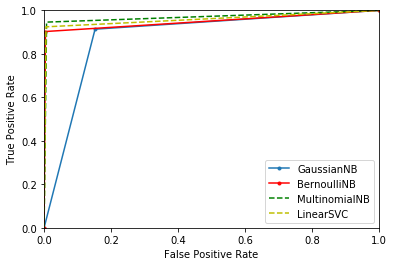

In [ ]:
pyplot.axis([0, 1.0, 0, 1.0])
gnb_fpr, gnb_tpr, _ = roc_curve(y_test, y_pred_GNB)
pyplot.plot(gnb_fpr, gnb_tpr, marker='.', label='GaussianNB')
bnb_fpr, bnb_tpr, _ = roc_curve(y_test, y_pred_BNB)
pyplot.plot(bnb_fpr, bnb_tpr, marker='.',color='r', label='BernoulliNB')
mnb_fpr, mnb_tpr, _ = roc_curve(y_test, y_pred_MNB)
pyplot.plot(mnb_fpr, mnb_tpr, linestyle='--',color = 'g', label='MultinomialNB')
svc_fpr, svc_tpr, _ = roc_curve(y_test, y_pred_LSVC)
pyplot.plot(svc_fpr, svc_tpr, linestyle='--',color = 'y', label='LinearSVC')
pyplot.ylabel('True Positive Rate')
pyplot.xlabel('False Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

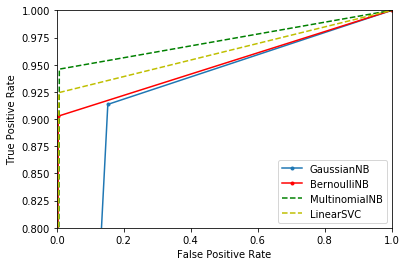

In [ ]:
pyplot.axis([0, 1.0, 0.8, 1.0])
gnb_fpr, gnb_tpr, _ = roc_curve(y_test, y_pred_GNB)
pyplot.plot(gnb_fpr, gnb_tpr, marker='.', label='GaussianNB')
bnb_fpr, bnb_tpr, _ = roc_curve(y_test, y_pred_BNB)
pyplot.plot(bnb_fpr, bnb_tpr, marker='.',color='r', label='BernoulliNB')
mnb_fpr, mnb_tpr, _ = roc_curve(y_test, y_pred_MNB)
pyplot.plot(mnb_fpr, mnb_tpr, linestyle='--',color = 'g', label='MultinomialNB')
svc_fpr, svc_tpr, _ = roc_curve(y_test, y_pred_LSVC)
pyplot.plot(svc_fpr, svc_tpr, linestyle='--',color = 'y', label='LinearSVC')
pyplot.ylabel('True Positive Rate')
pyplot.xlabel('False Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Comparing AUC Score 

In [ ]:
gnb_auc = roc_auc_score(y_test, y_pred_GNB)
bnb_auc = roc_auc_score(y_test, y_pred_BNB)
mnb_auc = roc_auc_score(y_test, y_pred_MNB)
svc_auc = roc_auc_score(y_test, y_pred_LSVC)
print("AUC Scores  \n","GaussianNB    :",gnb_auc*100,"\n BernoulliNB   :",bnb_auc*100,"\n*MultinomialNB :",mnb_auc*100,"\n LinearSVC     :",svc_auc*100)

AUC Scores  
 GaussianNB    : 88.05978163594057 
 BernoulliNB   : 94.92818149275104 
*MultinomialNB : 96.92478074100592 
 LinearSVC     : 95.92648111687848
